找模態

-----------
Initializing structure...
time for choose_chunkdivision = 0.0136001 s
Working in 2D dimensions.
Computational cell is 31 x 11 x 0 with resolution 128
     block, center = (0,-2.77,0)
          size (30,5.46,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (-14.95,0,0)
          size (0.086,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-14.85,0,0)
          size (0.086,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-14.75,0,0)
          size (0.086,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-14.65,0,0)
          size (0.086,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     bl

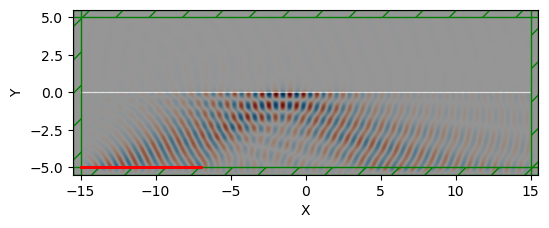

In [4]:
import cmath
import math
import meep as mp
from meep.materials import Ag
import numpy as np
import matplotlib.pyplot as plt
P=0.1
W=0.086
tg=0.08
n=1.5
grating_num=300
wavelength_spec=0.6
theta = 60*(np.pi/180)
wavelength = wavelength_spec / np.cos(theta)
celly=10
cellx=P*grating_num

dpml = 0.5  # thickness of PML layers
cell = mp.Vector3(cellx+2*dpml,celly+2*dpml,0)


pml_layers = [mp.PML(dpml)]
resolution = 128

fq=1/wavelength

#=============cosine beam =================
k = 2 * np.pi/wavelength ## k in air
n_index = n
kn = k * n_index # k in material

kx = k * np.sin(theta)
ky = np.sqrt( k**2  -kx**2)
width = 4
#location
src_lc = mp.Vector3(-cellx/2+width, -celly/2)

alpha = 0.015 # cosine beam parameter;should << 1

def cosine_beam_x(k,width,theta):
    def _pw_amp(x):
        direction=mp.Vector3(0,1,0).rotate(mp.Vector3(z=1), theta)
        phase = x / wavelength * np.sin(theta) 
        #return np.cos(alpha*k*(x).cross(direction).norm())*np.exp(-1j*ky*direction.dot(x))*np.exp(-(x).cross(direction).norm()**2/width**2)
        return  np.cos(theta) * np.cos(alpha*kn*x.norm()) *np.exp(-1j*kn*direction.dot(x))
 
    return _pw_amp

def cosine_beam_y(k,width,theta):
    def _pw_amp(x):
        direction=mp.Vector3(0,1,0).rotate(mp.Vector3(z=1), theta)
        phase = x / wavelength * np.sin(theta) 
        #return np.cos(alpha*k*(x).cross(direction).norm())*np.exp(-1j*ky*direction.dot(x))*np.exp(-(x).cross(direction).norm()**2/width**2)
        return  -np.sin(theta) * np.cos(alpha*kn*x.norm()) *np.exp(-1j*kn*direction.dot(x))
 
    return _pw_amp
#=========================================



        
geometry =[mp.Block(size=mp.Vector3(cellx,(celly-tg)/2+dpml),
                     center=mp.Vector3(0,-(celly+tg+2*dpml)/4,0),
                     material=mp.Medium(index=n))]
#"""
for i in range(grating_num):
    geometry.append(mp.Block(size=mp.Vector3(W,tg,mp.inf),
                         center=mp.Vector3(-cellx/2+(i+0.5)*P,0,0),
                         material=Ag))
#"""
sources = [mp.Source(
        mp.ContinuousSource(fq),
        component = mp.Ex,
        center = src_lc,
        size = mp.Vector3(2*width,0),
        amp_func = cosine_beam_x(k,width,theta)
    ),
           mp.Source(
        mp.ContinuousSource(fq),
        component = mp.Ey,
        center = src_lc,
        size = mp.Vector3(2*width,0),
        amp_func = cosine_beam_y(k,width,theta)
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    geometry=geometry,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=1),
)

t = 100  # run time
sim.run(mp.at_end(mp.output_efield_z), until=t)
plt.figure(dpi=100)
sim.plot2D(fields=mp.Hz)
plt.show()

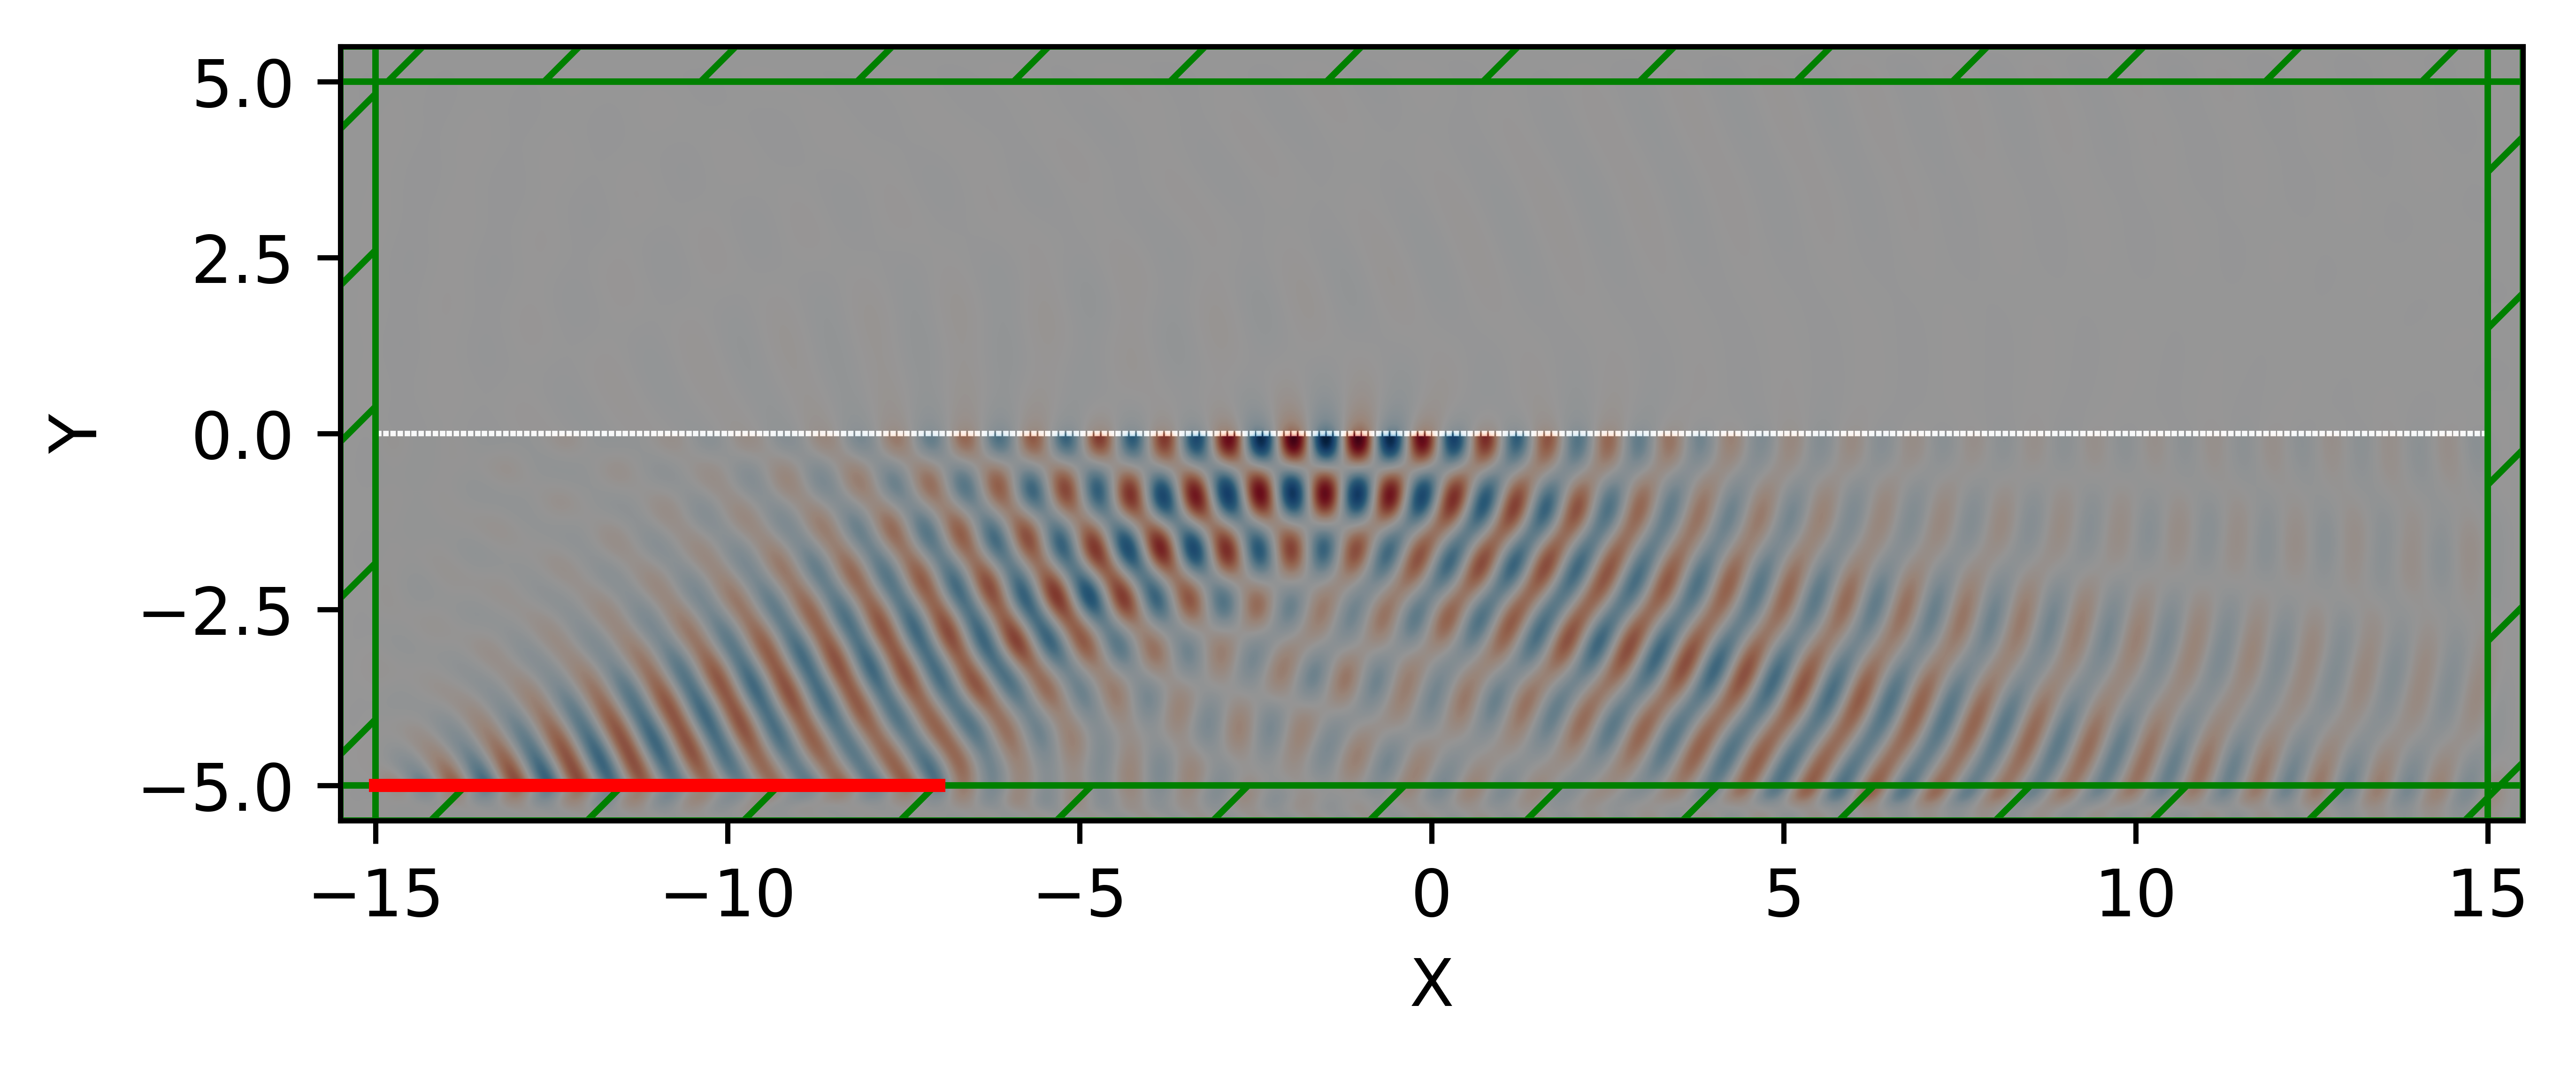

In [5]:
plt.figure(dpi=1000)
sim.plot2D(fields=mp.Hz)
plt.show()

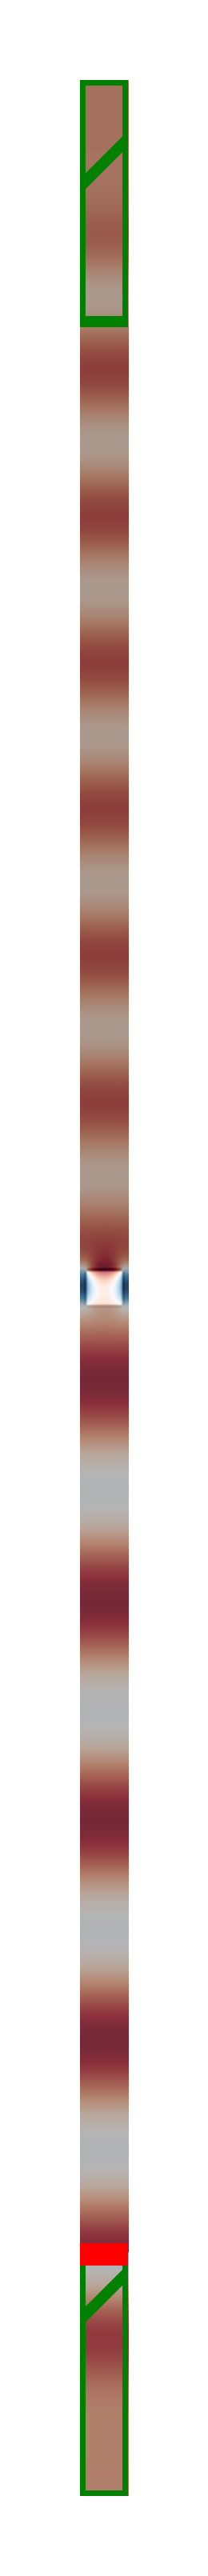

In [49]:
plt.figure(dpi=1000)
sim.plot2D(fields=mp.Hz)
plt.axis("off")
plt.show()